# Patent network analysis
> The post shows how to build an inventor-level network related to a Danish Pharmaceutical company, and it identifies the most influential inventors among the largest communities detected by means of a UML application. The paper argues that network analysis would be instrumental in solving cases where companies have lost tracks of inventors.

- toc: true 
- badges: true
- hide_binder_badge: true
- comments: true
- categories: [Network Analysis, Intellectual property, Patent data]


In [ ]:
import pandas as pd
import string as str
import regex as re
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSBA Patent Project /Paper /test NPA/patbase_export_296387709.csv')

#EDA

In [ ]:
df.columns

Index(['Family Number', 'Earliest Priority Date', 'Extended Family Number',
       'Calculated Expiry Date', 'Earliest Priority Country',
       'Original Patent Number', 'Original Kind Code',
       'Original Application Number', 'DOCDB Patent Number', 'DOCDB Kind Code',
       'DOCDB Application Number', 'Earliest Publication Number',
       'Earliest Publication Date', 'Assignees', 'Inventors',
       'Inventor Details Name', 'Inventor Details Std/Non Std',
       'Inventor Details Address', 'Assignee Details Name',
       'Assignee Details Std/Non Std', 'Assignee Details Address', 'Agent',
       'Agent Details Name', 'Agent Details Address', 'Title', 'Abstract',
       '1st Main Claim', 'Number of Claims', 'Number of Independent Claims',
       'Backward Citations', 'Forward Citations',
       'Number of Backward Citations', 'Number of Forward Citations',
       'NPL Citations', 'Number of NPL Citations', 'Cooperative Patent Class',
       'International Class', 'US Class', 'Paten

In [ ]:
print(df.shape)

(3762, 40)


In [ ]:
df.head(3)

,Family Number,Earliest Priority Date,Extended Family Number,Calculated Expiry Date,Earliest Priority Country,Original Patent Number,Original Kind Code,Original Application Number,DOCDB Patent Number,DOCDB Kind Code,DOCDB Application Number,Earliest Publication Number,Earliest Publication Date,Assignees,Inventors,Inventor Details Name,Inventor Details Std/Non Std,Inventor Details Address,Assignee Details Name,Assignee Details Std/Non Std,Assignee Details Address,Agent,Agent Details Name,Agent Details Address,Title,Abstract,1st Main Claim,Number of Claims,Number of Independent Claims,Backward Citations,Forward Citations,Number of Backward Citations,Number of Forward Citations,NPL Citations,Number of NPL Citations,Cooperative Patent Class,International Class,US Class,Patent Type,Grant
0,20652658,19961031,NaN,20171031.0,DK,US06020349,A,US08962098,US6020349,A,US96209897,US6020349 A,20000201,NOVO NORDISK AS,ANKERSEN MICHAEL; STIDSEN CARSTEN ENGGAARD; CR...,ANKERSEN MICHAEL; STIDSEN CARSTEN ENGGAARD; CR...,Standard; Standard; Standard; Standard,DK; DK; US; DK,NOVO NORDISK AS; NOVO NORDISK A S,Standard; Non Standard,DK;,NaN,NaN,NaN,[EN] CONSTRAINED SOMATOSTATIN AGONISTS AND ANT...,[EN] The present invention relates to a compou...,[EN] 1. A compound of formula I: wherein A is ...,20,1,DE3631334 A1; EP0304330 A1; EP0448765 A1; US42...,US2003195187 AA; US2003207814 AA; US2003229025...,6,40,"Woderer et al., Chem. Ber. 119, 2050-2054, (19...",2,A61P1/00; A61P11/00; A61P25/00; A61P27/02; A61...,A61K31/44; A61K31/4439; A61K31/445; A61K31/454...,514/253.01; 514/318; 514/340; 514/341; 514/866...,NaN,YES
1,20652658,19961031,NaN,20171031.0,DK,US06083960,A,US09397355,US6083960,A,US39735599,US6083960 A,20000704,NOVO NORDISK AS,ANKERSEN MICHAEL; STIDSEN CARSTEN ENGGAARD; CR...,ANKERSEN MICHAEL; STIDSEN CARSTEN ENGGAARD; CR...,Standard; Standard; Standard; Standard,DK; DK; US; DK,NOVO NORDISK AS; NOVO NORDISK A S,Standard; Non Standard,DK;,NaN,NaN,NaN,[EN] CONSTRAINED SOMATOSTATIN AGONISTS AND ANT...,[EN] The present invention relates to a compou...,[EN] 1. A compound formula I wherein A is pyri...,11,1,DE3631334 A1; EP0304330 A1; EP0448765 A1; US42...,US2004106625 AA; US2008153835 AA; US7279493 BB...,6,4,"Woderer et al., Chem. Ber. 119, 2050-2054, (19...",2,A61P1/00; A61P11/00; A61P25/00; A61P27/02; A61...,A61K31/44; A61K31/4439; A61K31/445; A61K31/454...,514/253.01; 514/318; 514/338; 514/344; 514/866...,NaN,YES
2,15295978,19990817,NaN,20190826.0,DK,US06586574,B1,US09638590,US6586574,B1,US63859000,US6586574 BA,20030701,NN AS,HANSEN LARS LINDGAARD,HANSEN LARS LINDGAARD; LARS LINDGAARD HANSEN,Standard; Non Standard,DK; GADSTRUP DK,NN AS; NN A S; NOVO NORDISK A S; NOVO NORDISK ...,Standard; Non Standard; Non Standard; Non Stan...,DK; BAGSVAERD DK; ; ;,MARC A BEGAN ESQ; REZA GREEN ESQ; RICHARD W BO...,MARC A BEGAN ESQ; REZA GREEN ESQ; RICHARD W BO...,; ;,[EN] STABILIZATION OF FREEZE-DRIED CAKE,[EN] The invention relates to the use of glycy...,[EN] 1. A lyophilized composition comprising a...,13,2,EP0359201 A2; US3773626 A; US4297344 A; US4687...,CN107073082 A; EP3182993 A4; EP3750556 A1; US1...,9,44,"Davis et al., Archives of Biochemistry and Bio...",5,A61K47/183; A61K47/26; A61K9/19; C12N9/96,A61K47/16; A61K47/18; A61K47/26; A61K9/19; C12...,252/363.5; 530/384; 514/971; 514/834; 514/802;...,NaN,YES


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Family Number                 3762 non-null   int64  
 1   Earliest Priority Date        3762 non-null   int64  
 2   Extended Family Number        154 non-null    float64
 3   Calculated Expiry Date        2810 non-null   float64
 4   Earliest Priority Country     3762 non-null   object 
 5   Original Patent Number        3737 non-null   object 
 6   Original Kind Code            3737 non-null   object 
 7   Original Application Number   3737 non-null   object 
 8   DOCDB Patent Number           3748 non-null   object 
 9   DOCDB Kind Code               3748 non-null   object 
 10  DOCDB Application Number      3748 non-null   object 
 11  Earliest Publication Number   3762 non-null   object 
 12  Earliest Publication Date     3762 non-null   int64  
 13  Ass

There are three variables that relate to the inventor-level, being 

*   The inventor 
*   Inventor Details Name
*   Inventor Details Address

In [ ]:
df['DOCDB Patent Number'].nunique() # we could use this variable as a unique ID 

3748

By means of EDA, we found out that we could use the above variable as a unique ID variable.

In [ ]:
print(df.Inventors.head(1))

0    ANKERSEN MICHAEL; STIDSEN CARSTEN ENGGAARD; CR...
Name: Inventors, dtype: object


#Create the data set for the network

In [ ]:
df1 = df.Inventors.str.split(';', expand = True) # creating a wide data set from the invetors column, placing each and every inventor in a different column
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
df1 = df1.join(df['DOCDB Patent Number']) # join also the column of unique IDs
# df1 = df1.join(df['Inventor Details Address']) for the future
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,DOCDB Patent Number
0,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6020349
1,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6083960


In [ ]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,DOCDB Patent Number
0,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6020349
1,ANKERSEN MICHAEL,STIDSEN CARSTEN ENGGAARD,CRIDER ALBERT MICHAEL,DORWALD FLORENZIO ZARAGOZA,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6083960
2,HANSEN LARS LINDGAARD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6586574
3,KOCH KAREN,KVORNING INGELISE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US7018992
4,HOFSTAETTER THIBAUD,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US5860946
5,ROJKJAER RASMUS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US2003118580
6,ROJKJAER RASMUS,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US2008075709
7,AHMADIAN HALEH,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US2008268521
8,PERSSON EGON,OLSEN OLE HVILSTED,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6911323
9,SORENSEN BRIT BINOW,PETERSEN LARS CHRISTIAN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,US6858587


In [ ]:
df1['DOCDB Patent Number'].isnull().sum()

14

In [ ]:
df1 = df1.dropna(subset=['DOCDB Patent Number'])
df1.shape

(3748, 19)

In [ ]:
# Create a new list for the columns name
new_col_list = ['inventor1', 'inventor2', 'inventor3', 'inventor4',  'inventor5', 'inventor6', 'inventor7', 'inventor8', 'inventor9', 'inventor10', 'inventor11', 'inventor12', 'inventor13', 'inventor14', 'inventor15', 'inventor16', 'inventor17', 'inventor18', 'patent_number']

In [ ]:
# get the old columns names
old_columns = list(df1)
print(old_columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'DOCDB Patent Number']


In [ ]:
# rename the columns inplate
df1.rename(columns = {old_columns[idx]: name for (idx, name) in enumerate (new_col_list)}, inplace = True)

In [ ]:
df2 = pd.wide_to_long(df1, stubnames='inventor',i = 'patent_number', j = 'irrelevant')

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.head(3) # here we can appreciate a dataframe where the inventor is indexed by the patent number

,,inventor
patent_number,irrelevant,
US6020349,1,ANKERSEN MICHAEL
US6083960,1,ANKERSEN MICHAEL
US6586574,1,HANSEN LARS LINDGAARD


In [ ]:
df2.shape # indeed the shape of such a dataframe is given by the product of the number of unique inventors times the time that they invented

(13253, 1)

In [ ]:
df2 = df2.reset_index(level=['patent_number']) #reset_index transforms an index of a df into a features

In [ ]:
df2.head()

,patent_number,inventor
irrelevant,,
1,US6020349,ANKERSEN MICHAEL
1,US6083960,ANKERSEN MICHAEL
1,US6586574,HANSEN LARS LINDGAARD
1,US7018992,KOCH KAREN
1,US5860946,HOFSTAETTER THIBAUD


In [ ]:
df2['inventor_id'] = df2['inventor'].factorize()[0] #create a new column with a id per each and every unique inventor 

In [ ]:
df2.head(6)

,patent_number,inventor,inventor_id
irrelevant,,,
1,US6020349,ANKERSEN MICHAEL,0
1,US6083960,ANKERSEN MICHAEL,0
1,US6586574,HANSEN LARS LINDGAARD,1
1,US7018992,KOCH KAREN,2
1,US5860946,HOFSTAETTER THIBAUD,3
1,US2003118580,ROJKJAER RASMUS,4


In [ ]:
#df2['patent_number'].count()
df2['patent_number'].nunique() # this number is 1 less than some cells before

3747

#Edge list
We can create an edge list merging the dataframe with itself using the patent_number, so that, each and every row represents the coinvention of two inventors of the same patent. The only thing that we then need to remove are self-links since a person can not really invent with herself.


In [ ]:
edges = pd.merge(df2, df2, on = 'patent_number')

In [ ]:
edges.head(2) # talking about self-links, you have an example just here

,patent_number,inventor_x,inventor_id_x,inventor_y,inventor_id_y
0,US6020349,ANKERSEN MICHAEL,0,ANKERSEN MICHAEL,0
1,US6020349,ANKERSEN MICHAEL,0,STIDSEN CARSTEN ENGGAARD,1487


In [ ]:
# Filter out self-edges
edges = edges[edges.inventor_id_x != edges.inventor_id_y]

In [ ]:
# edges_ankersen = edges[edges['inventor_id_x'] == 0] # examples of co-inventions of ANKERSEN MICHAEL

We are now in a situation where people that co-invented a patent will have at least one row per invention. This can be aggregated in the following way by grouping.

In [ ]:
# grouping to aggregate multiple co-occurences and to generate a weight: 
# How many times did Person X and Person Y co-invented together
# reset_index makes everytging from a multi-index-series into a dataframe
edges = edges.groupby(['inventor_id_x', 'inventor_id_y']).size().reset_index()

In [ ]:
edges.head(2)

,inventor_id_x,inventor_id_y,0
0,0,1487,3
1,0,1520,1


The column called "0" counts how many time a person x & a person y co-invent

In [ ]:
edges.shape

(29532, 3)

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


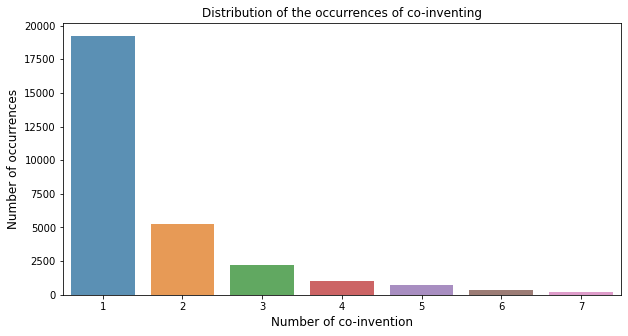

In [ ]:
dist_coinv = edges[0].value_counts() # distribution of the number of co-inventions, i.e., there are 5270 pair of inventors that have co-invented 2 patents.
dist_coinv = dist_coinv[:7, ]
plt.figure(figsize = (10,5))
sns.barplot(dist_coinv.index, dist_coinv.values, alpha = 0.8)
plt.title('Distribution of the occurrences of co-inventing')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Number of co-invention', fontsize=12)
plt.show()

In [ ]:
edges.rename({0:'weight'}, axis = 1, inplace=True)

# Creating the Graph object with NetworkX

Now we can create a network object from this edgelist. 

In [ ]:
import networkx as nx
from community import community_louvain

In [ ]:
# Create network object from pandas edgelist 
# The nodes are the inventors and the edges are weighted by the number of co-invention occured between two inventors
G = nx.from_pandas_edgelist(edges, source='inventor_id_x', target='inventor_id_y', edge_attr='weight', create_using = nx.Graph())

In [ ]:
df2[['inventor_id','inventor']]

,inventor_id,inventor
irrelevant,,
1,0,ANKERSEN MICHAEL
1,0,ANKERSEN MICHAEL
1,1,HANSEN LARS LINDGAARD
1,2,KOCH KAREN
1,3,HOFSTAETTER THIBAUD
...,...,...
15,4135,KUKI ATSUO
16,4136,VANOVA HANA
16,4137,TESTON KIMBERLY ANN


In [ ]:
df2[['inventor_id','inventor']].set_index('inventor_id')

,inventor
inventor_id,
0,ANKERSEN MICHAEL
0,ANKERSEN MICHAEL
1,HANSEN LARS LINDGAARD
2,KOCH KAREN
3,HOFSTAETTER THIBAUD
...,...
4135,KUKI ATSUO
4136,VANOVA HANA
4137,TESTON KIMBERLY ANN


In [ ]:
# We can create a node-attribute dictionary, i.e., adding the attribute name, directly from the dataframe (using pandas to_dict)
node_attributes = df2[['inventor_id','inventor']].set_index('inventor_id').drop_duplicates().to_dict('index')

In [ ]:
# We now can include the degree as node-attribute. Why?
nx.set_node_attributes(G, {G.degree(): 'degree'})

In [ ]:
# and use the node_attribute object to include all that in the graph object
nx.set_node_attributes(G, node_attributes)

In [ ]:
len(G.nodes())

3961

In [ ]:
len(G.edges())

14766

# Centrality indicators 
From here we will calculate various centrality measures and perform community detection. Think about the latter as UML (which it actually is).
This will allow us to investigate e.g.: 

- Who are the top people in these communities?

In [ ]:
# Here we can calculate different centrality indicators as well as partition (community detection)
centrality_dgr = nx.degree_centrality(G)
centrality_eig = nx.eigenvector_centrality_numpy(G)
partition = community_louvain.best_partition(G) #that will take some time...
degree = G.degree()

In [ ]:
# All these indicators can now be set as attribute of the Graph
nx.set_node_attributes(G, centrality_dgr, 'dgr')
nx.set_node_attributes(G, centrality_eig, 'eig')
nx.set_node_attributes(G, partition, 'partition')
nx.set_node_attributes(G, dict(degree), 'degree_basic')

## Bringing it back to pandas

Once all graph indicators are in place, we can bring them back to Pandas for easier further analysis 🧐. You can compare that step to inspecting individual clusters identified with e.g. K-means.


In [ ]:
# This is how you turn a Graph object (NetworkX) to a Dataframe
nodes_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [ ]:
# For that we can e.g. sort the dataframe by eigenvector (only first 10 rows)
nodes_df.sort_values('eig', ascending=False)[:10]

,inventor,dgr,eig,partition,degree_basic
1655,LAU JESPER,0.047727,0.322390,48,189
1558,MADSEN PETER,0.038636,0.223897,11,153
1762,KODRA JANOS TIBOR,0.025505,0.207342,48,101
1763,BEHRENS CARSTEN,0.024495,0.165824,48,97
2359,GARIBAY PATRICK WILLIAM,0.017424,0.138849,6,69
2052,THOEGERSEN HENNING,0.022475,0.135706,6,89
2489,BLOCH PAW,0.014646,0.131985,48,58
1630,ANDERSEN HENRIK SUNE,0.024495,0.127523,11,97
1519,ANKERSEN MICHAEL,0.015657,0.127359,48,62
1823,MADSEN KJELD,0.018687,0.122319,48,74


In [ ]:
# How many communities are there (identified automatically)
nodes_df.partition.nunique()

284

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


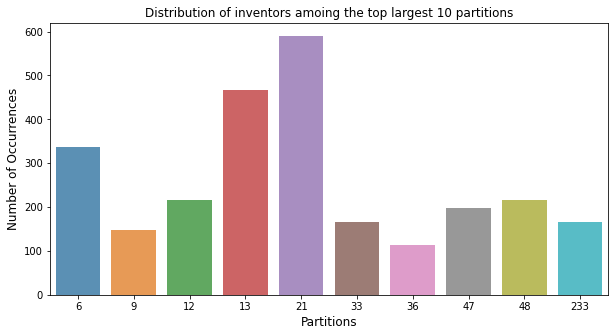

In [ ]:
# Let's look at how many people there are in the top 20 partitions
dist_part = nodes_df.partition.value_counts()[:10]
plt.figure(figsize=(10,5))
sns.barplot(dist_part.index, dist_part.values, alpha=0.8)
plt.title('Distribution of inventors amoing the top largest 10 partitions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Partitions', fontsize=12)
plt.show()

In [ ]:
# Let's check out the first 5 partition 
top5_part = nodes_df.partition.value_counts()[:5].index

In [ ]:
# I want to find out woh are the top people in this partitions
top5_part_nodes = nodes_df[nodes_df.partition.isin(top5_part)].index

In [ ]:
# I create a subgraph with only the poeple on the top 5 partition 
G_sub = nx.subgraph(G, top5_part_nodes)

In [ ]:
# Pandas approach to transform a graph into a dataframe
nodes_df_top5 = nodes_df[nodes_df.partition.isin(top5_part)]

In [ ]:
nodes_df_top5.head(2)

,inventor,dgr,eig,partition,degree_basic
0,ANKERSEN MICHAEL,0.002273,0.023971,48,9
1487,STIDSEN CARSTEN ENGGAARD,0.001010,0.000872,48,4


In [ ]:
# Let's look at the "most important" people by grouping up and keeping the 5 observations
# with the highest eigenvector centrality
top_people = nodes_df_top5.groupby('partition')['eig'].nlargest(5).reset_index()

In [ ]:
# After that we need to bring back ID's (rename) and Names (merge)
top_people.rename({'level_1':'inventor_id'}, axis=1, inplace=True)

In [ ]:
top_people = pd.merge(top_people, df2[['inventor','inventor_id']].drop_duplicates(), on='inventor_id', how='inner')

In [ ]:
top_people.head(50)

,partition,inventor_id,eig,inventor
0,6,2359,0.138849,GARIBAY PATRICK WILLIAM
1,6,2052,0.135706,THOEGERSEN HENNING
2,6,1595,0.116120,HOEG JENSEN THOMAS
3,6,1820,0.102756,LAU JESPER F
4,6,1933,0.095319,KRUSE THOMAS
5,12,1511,0.094768,SAUERBERG PER
6,12,1531,0.089727,PETTERSSON INGRID
7,12,1571,0.068005,PETERSEN ANDERS KLARSKOV
8,12,1555,0.062463,OLESEN PREBEN HOULBERG
9,12,449,0.052110,KRUSE THOMAS


Now we can explore the names, happy stalking. 